In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
pwd

'C:\\E Drive\\Mixed Materials\\AI-ML\\Python Code and Practice\\KaggleData\\KNN Datasets'

In [23]:
# Context
# This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

# Content
# Attribute Information:

# Id number: 1 to 214 (removed from CSV file)
# RI: refractive index
# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# Mg: Magnesium
# Al: Aluminum
# Si: Silicon
# K: Potassium
# Ca: Calcium
# Ba: Barium
# Fe: Iron
# Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [24]:
df1 = pd.read_csv('glass.csv')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


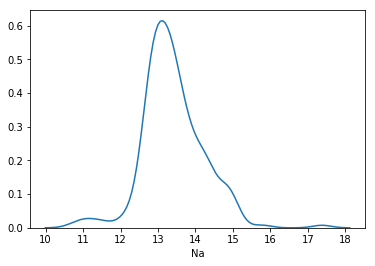

In [27]:
sns.distplot(df1['Na'], hist = False)

In [28]:
print ('Lower outliers' '\n', df1.quantile(0.25) - 1.5 * (df1.quantile(0.75) - (df1.quantile(0.25))))
print ('\n')
print ('Higher outliers' '\n',df1.quantile(0.75) + 1.5 * (df1.quantile(0.75) - (df1.quantile(0.25))))
       


Lower outliers
 RI       1.51257
Na      11.53125
Mg      -0.11250
Al       0.53000
Si      71.06875
K       -0.60875
Ca       6.84125
Ba       0.00000
Fe      -0.15000
Type    -2.00000
dtype: float64


Higher outliers
 RI       1.52311
Na      15.20125
Mg       5.82750
Al       2.29000
Si      74.29875
K        1.34125
Ca      10.57125
Ba       0.00000
Fe       0.25000
Type     6.00000
dtype: float64


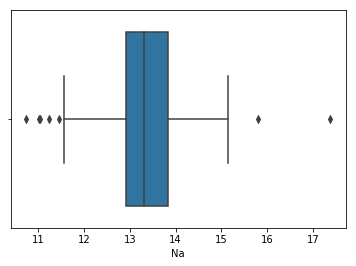

In [29]:
sns.boxplot(df1['Na'])

In [30]:
df1.drop(df1[df1.Na > 15.20125].index, inplace = True)

In [31]:
df1.drop(df1[df1.Na < 11.54000].index, inplace = True)

In [32]:
# type as category
df1['Type'] = df1['Type'].astype('category')

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 213
Data columns (total 10 columns):
RI      207 non-null float64
Na      207 non-null float64
Mg      207 non-null float64
Al      207 non-null float64
Si      207 non-null float64
K       207 non-null float64
Ca      207 non-null float64
Ba      207 non-null float64
Fe      207 non-null float64
Type    207 non-null category
dtypes: category(1), float64(9)
memory usage: 16.6 KB


In [34]:
df1_ind = df1.drop('Type', axis = 1)

In [35]:
df1_label = df1['Type']

In [89]:
df1_label.unique()

[1, 2, 3, 5, 6, 7]
Categories (6, int64): [1, 2, 3, 5, 6, 7]

In [134]:
X = np.array(df1_ind)
X.shape
y = np.array(df1_label)
y.shape

(207,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [44]:
myList = list(range(1,50))

In [45]:
cv_scores = []
k_neighbours = []

In [47]:
for k in myList:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X_train,y_train,cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    k_neighbours.append(k)
    
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ('Number of Neighbours %d' %best_k)

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py3

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py3

Number of Neighbours 1


C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py3

In [48]:
NNh = KNeighborsClassifier(n_neighbors= 1, weights = 'distance')

In [49]:

NNh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [50]:
pred = NNh.predict(X_test)

In [51]:
preds = np.array(pred)
preds.shape

(63,)

In [54]:
NNh.score(X_train,y_train)

1.0

In [55]:
NNh.score(X_test,y_test)

0.7777777777777778

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
print (confusion_matrix(y_test, preds))
print (classification_report(y_test, preds))

[[23  2  0  0  0  0]
 [ 4  9  0  0  3  0]
 [ 3  0  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  1 10]]
              precision    recall  f1-score   support

           1       0.77      0.92      0.84        25
           2       0.82      0.56      0.67        16
           3       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         4
           6       0.33      0.67      0.44         3
           7       0.91      0.91      0.91        11

   micro avg       0.78      0.78      0.78        63
   macro avg       0.80      0.72      0.71        63
weighted avg       0.81      0.78      0.77        63



In [58]:
from pandas_ml import ConfusionMatrix

In [59]:
cm = ConfusionMatrix(y_test,preds)

In [60]:
cm

Predicted   1   2  3  5  6   7  __all__
Actual                                 
1          23   2  0  0  0   0       25
2           4   9  0  0  3   0       16
3           3   0  1  0  0   0        4
5           0   0  0  4  0   0        4
6           0   0  0  0  2   1        3
7           0   0  0  0  1  10       11
__all__    30  11  1  4  6  11       63

In [64]:
cm.plot
plt.show()

In [66]:
cm.print_stats()

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   1   2  3  5  6   7  __all__
Actual                                 
1          23   2  0  0  0   0       25
2           4   9  0  0  3   0       16
3           3   0  1  0  0   0        4
5           0   0  0  4  0   0        4
6           0   0  0  0  2   1        3
7           0   0  0  0  1  10       11
__all__    30  11  1  4  6  11       63


Overall Statistics:

Accuracy: 0.7777777777777778
95% CI: (0.6553558462956381, 0.8728492567468735)
No Information Rate: ToDo
P-Value [Acc > NIR]: 9.458730135068416e-07
Kappa: 0.6941747572815535
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        1          2          3          5          6          7
Population                                    63         63         63         63         63         63
P: Condition positive                         25         16          4          4          3         11
N: Condition negative                         38         47    